In [ ]:
## analyze same analytics with other cascades(as with juul)..
## look at all other cascades...

In [346]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy
from cascade import Cascade

In [347]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [348]:
%reload_ext autoreload

In [349]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [350]:
model_path = os.path.join(get_git_root(os.getcwd()),"models")

In [351]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [561]:
def get_shells(G):
    nodes_depth = nx.get_node_attributes(G,'level')
    if not(nodes_depth):
        nodes_depth = nx.get_node_attributes(G,'depth')
    if nodes_depth:
        counter = 0
        shells = list()
        while True:
            if ([k for k,v in nodes_depth.items() if v == counter]):
                shells.append([k for k,v in nodes_depth.items() if v == counter])
                counter += 1 
            else:
                break
        return(shells)
    else:
        print("depth not encoded in graph")
    

In [414]:
def get_color_map(pos,shells):
    depth_nodes = dict()
    color_map = list()
    for idx,nodes in enumerate(shells):
        depth_nodes[idx] = nodes
    color_list = ["yellow","green","blue","pink","violet"]
    for node in pos.keys():
        depth = [depth for depth,nodes in depth_nodes.items() if node in nodes][0]
        color_map.append(color_list[depth])  
    return(color_map)

In [441]:
def plot(G):
    %matplotlib inline
    plt.figure(figsize=(15,15))
    shells = get_shells(G)
    if (shells):
        pos = nx.shell_layout(G,shells)
        color_map = get_color_map(pos,shells)
        nx.draw(G,with_labels=False,nodelist=pos.keys(),pos=pos,node_color=color_map)
    else:
        nx.draw(G,with_labels=False)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()
    plt.title("2 level cascade")
    plt.show()

In [357]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
model_path = os.path.join(get_git_root(os.getcwd()),"models")
graph_path = os.path.join(get_git_root(os.getcwd()),"models","graphs")

In [356]:
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [ ]:
## get all of the cascades..
hexagon_data.loc[hexagon_data['retweetCount'] >= 1]

In [365]:
## getting the tweet text and their occurances
tweet_text_list = list()
df_tweets = pd.DataFrame([])
for index,tweet in hexagon_data.iterrows():
    user = tweet['userID']
    text = tweet['tweetText']
    retweet_count = tweet['retweetCount']
    if retweet_count > 0:
        if text not in tweet_text_list:
            tweet_text_list.append(text)
            df_tweets = df_tweets.append(pd.DataFrame({'tweet_text':text, 
                                           'retweet_count':retweet_count},index=[0]),
                             ignore_index=True)

In [ ]:
## there are 1771 cascades = 0
len(df_tweets.loc[df_tweets.retweet_count ==0])

In [345]:
## there are 1771 cascades > 0
len(df_tweets.loc[df_tweets.retweet_count >0])

1771

In [372]:
len(df_tweets.loc[df_tweets.retweet_count >=2])

751

In [ ]:
(df_tweets.loc[df_tweets.retweet_count >10])

In [269]:
hexagon_data

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
0,668,None,371,['JUUL'],http://pbs.twimg.com/profile_images/590395947990929408/UwjBNF2R_normal.jpg,en,0,False,2015-06-10 00:25:21,608429710989783041,@KenHeindel Sorry to hear that Ken. Please DM us your email and the #JUUL care team will assist however they can.,2014-12-03 23:28:22,"At JUUL, our mission is to improve the lives of the world’s one billion adult smokers. +21+ DM for Twitter Customer Service 8am-5:30pm PT M-F. #SwitchToJUUL",19707,2918018660,San Francisco,JUUL\r
1,4668,None,881,['JUUL'],http://pbs.twimg.com/profile_images/779839998480658432/a0lADx7M_normal.jpg,en,0,False,2015-06-04 21:57:23,606580531233316864,#JUUL - Smoking Evolved. Check it out: https://t.co/0e6eH5noYm,2012-02-06 23:31:52,"Desert Shield/Storm Veteran, Ex stockbroker, ex-smoker, wannabe Transhumanist",189,485212274,"North Carolina, USA",Thomas Toledo\r
2,668,None,371,['JUUL'],http://pbs.twimg.com/profile_images/590395947990929408/UwjBNF2R_normal.jpg,en,0,False,2015-06-08 21:33:09,608023985494720512,@katsushiro Nothing like that planned for the near future. Be sure you're signed up for all the latest from #JUUL: https://t.co/CKtxfeZmJg,2014-12-03 23:28:22,"At JUUL, our mission is to improve the lives of the world’s one billion adult smokers. +21+ DM for Twitter Customer Service 8am-5:30pm PT M-F. #SwitchToJUUL",19707,2918018660,San Francisco,JUUL\r
3,904,None,483,"['pride', 'JUULvapor']",http://pbs.twimg.com/profile_images/989187403465285632/qHg7Zee7_normal.jpg,en,0,False,2015-06-29 15:58:19,615549868967337984,Last one I promise 😜🌈 #pride #JUULvapor samboudloche https://t.co/UYk3uN4CPV,2009-04-04 05:27:45,It's GUTCHES like DUCHESS not GOOCHES like HOOCHES...the more you know!,522,28747090,"New York, NY",Kevin Gutches\r
4,668,None,371,['JUUL'],http://pbs.twimg.com/profile_images/590395947990929408/UwjBNF2R_normal.jpg,en,0,False,2015-06-22 23:08:37,613121440116707329,@jacksonfall #JUUL is pretty great - you can pick one up on our website :-),2014-12-03 23:28:22,"At JUUL, our mission is to improve the lives of the world’s one billion adult smokers. +21+ DM for Twitter Customer Service 8am-5:30pm PT M-F. #SwitchToJUUL",19707,2918018660,San Francisco,JUUL\r
5,0,None,61,['juul'],http://pbs.twimg.com/profile_images/1595792899/IMG_1020_normal.jpg,en,0,False,2015-06-05 00:30:00,606618942061330432,"At Juul event with guillaumemalheiro #juul @ Chelsea, nyc https://t.co/7vWtDMFqCF",2009-07-07 15:51:27,Globe trotter,361,54585605,New York,PANNIER Damien\r
6,10,None,34,"['PAX', 'JUUL', 'vape']",http://pbs.twimg.com/profile_images/536708664380239872/TN0lNF8a_normal.png,et,0,False,2015-06-06 18:16:00,607249596478324736,RT xpressingit: Last one I promise juulvapor paxvapor #PAX #JUUL #vape sarahrinsf rpmumby sup___dude… http://t.co/eHQXE2TfGc;,2014-11-24 00:57:22,The Worlds Best #Vape Store:,3055,2908532184,NaN,Vape Merch\r
7,0,None,61,"['juul', 'jackstudio']",http://pbs.twimg.com/profile_images/1595792899/IMG_1020_normal.jpg,en,0,False,2015-06-05 01:45:26,606637925762277377,You rock @iamamayzing !! Thank you for invinting us 😊😊#juul #jackstudio @ Jack Studios https://t.co/eyTFZdpZvD,2009-07-07 15:51:27,Globe trotter,361,54585605,New York,PANNIER Damien\r
8,668,None,371,['JUUL'],http://pbs.twimg.com/profile_images/590395947990929408/UwjBNF2R_normal.jpg,en,0,False,2015-06-03 18:48:23,606170580732256256,@pkim24 Cheers! Be sure to sign up for 25% off your first #JUUL. Can't wait to hear what you think.,2014-12-03 23:28:22,"At JUUL, our mission is to improve the lives of the world’s one billion adult smokers. +21+ DM for Twitter Customer Service 8am-5:30pm PT M-F. #SwitchToJUUL",19707,2918018660,San Francisco,JUUL\r
9,3203,None,487,['JUUL'],http://pbs.twimg.com/profile_images/1044921882292756480/sZPO_PQJ_normal.jpg,en,0,False,2015-06-13 02:04:00,609541699442999296,Check me 

In [344]:
cas = Cascade()
for i in range(len(df_tweets[2:5])):
    cascade = hexagon_data.loc[hexagon_data.tweetText == df_tweets.tweet_text[i]]
    cascade['tweetCreatedAt'] = pd.to_datetime(cascade['tweetCreatedAt'])
    cascade.sort_values(by='tweetCreatedAt',ascending = True, inplace=True)
    source_node = cascade.head(1)['userID'].values[0]
    retweet_count = cascade.head(1)['retweetCount'].values[0]
    users = list(cascade['userID'])
    users.remove(source_node)
    G =  cas.get_cascade(cascade,source_node,users,level_termiante=None)
    filename = str('G_' + str(source_node) + '_'+ str(retweet_count)+'.gpickle')
    if G:
        nx.write_gpickle(G,os.path.join(model_path,'graphs',filename))
    else:
        print("blank_graph")

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
  0%|          | 0/7 [00:00<?, ?it/s]

blank_graph


  0%|          | 0/5 [00:00<?, ?it/s]

finding connection for followers network might take some time



100%|██████████| 5/5 [00:00<00:00, 528.93it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

at level 1
finding connection for followers network might take some time

at level 2
breaking as no progression


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

blank_graph


In [487]:
# lets read all the cascades and get some metrics
import os
filenames = [file for file in os.listdir(os.path.join(os.getcwd(),graph_path)) if file.endswith(".gpickle")]

In [536]:
counter = 0
for idx,file in enumerate(filenames):
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    if (G):
        print(idx,len(G.nodes()),file)
    else:
        print("here")
        os.remove(os.path.join(os.getcwd(),graph_path,file))

0 2 G_2764364902_15.gpickle
1 8 G_juul_cascade.gpickle
2 2 G_151973643_4.gpickle
3 387 tattoo.gpickle
4 3 G_3.gpickle
5 8 G_2937602802_8.gpickle
6 6 G_16870853_7.gpickle


In [538]:
filenames.remove('G_juul_cascade.gpickle')

G_2764364902_15.gpickle
{717910841530703872: 1, 2764364902: 0}
['yellow', 'green']


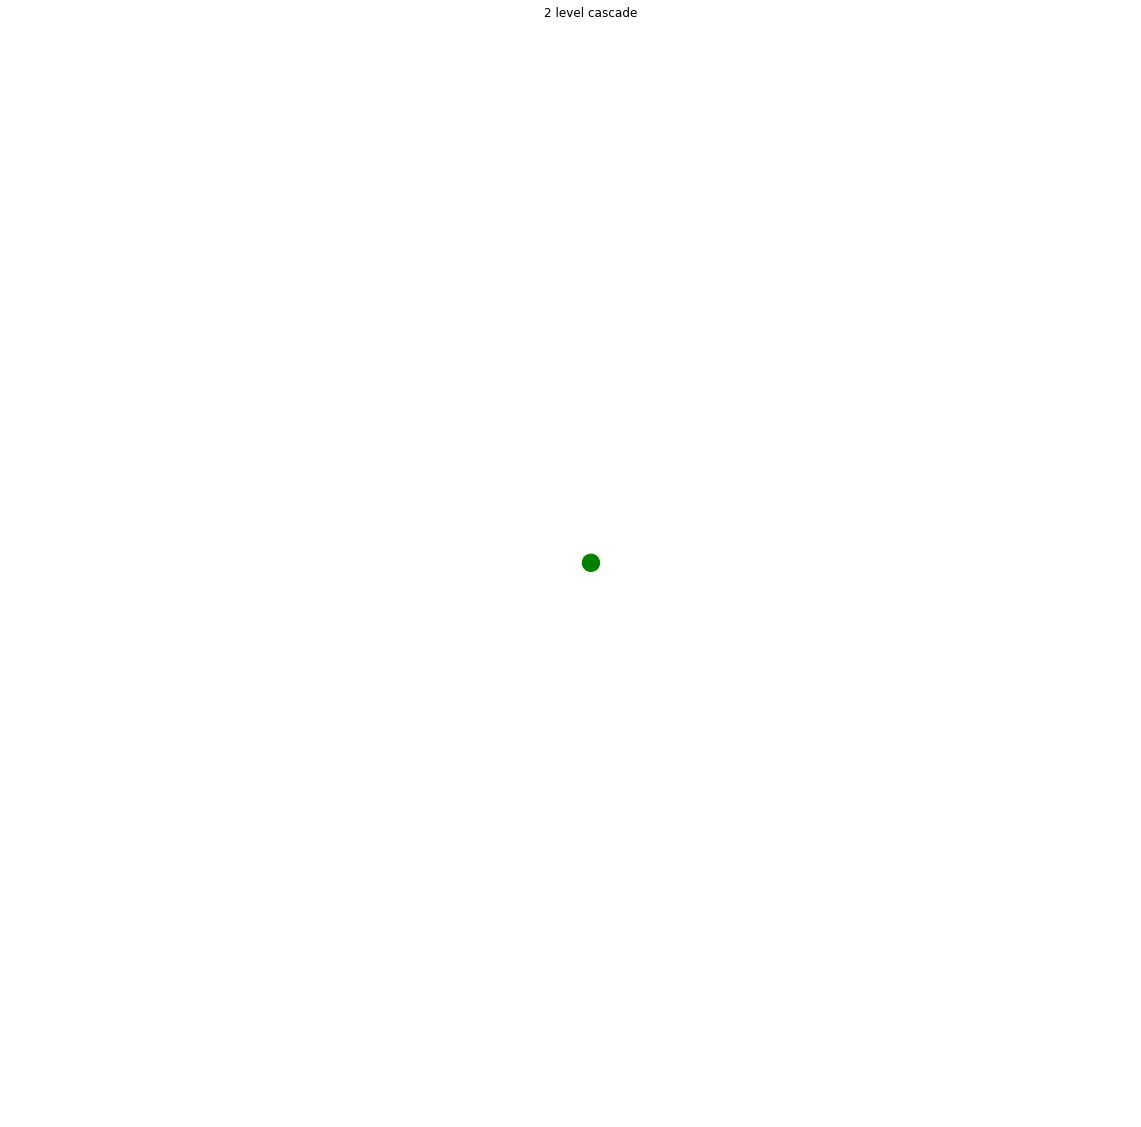

G_151973643_4.gpickle
{720956234: 1, 151973643: 0}
['yellow', 'green']


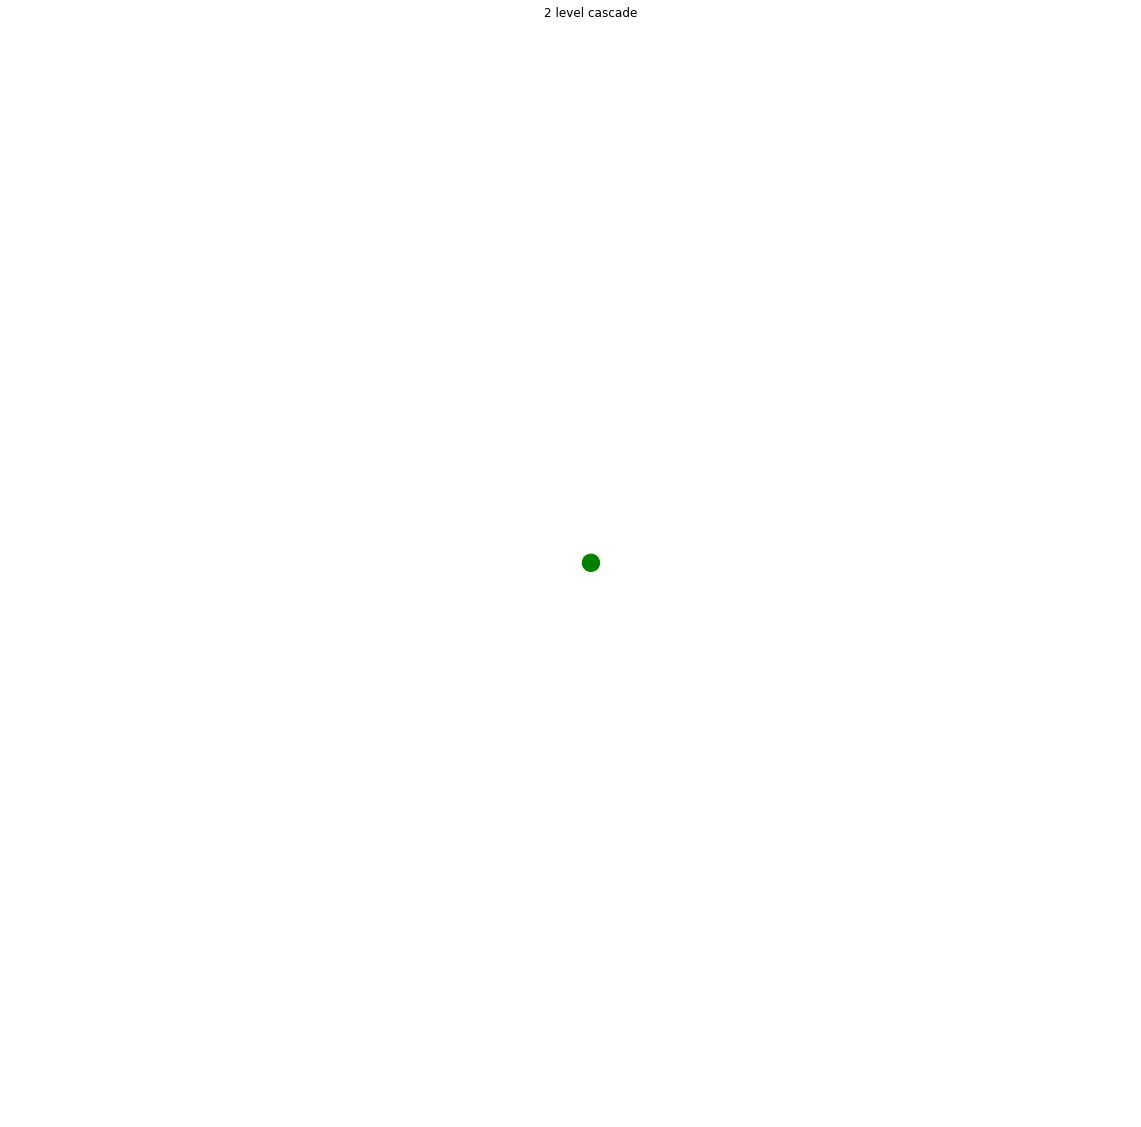

tattoo.gpickle
{}
{3221088973: 1, 1394686213: 0, 735553443620900864: 1, 943937965826420737: 1, 1254666378: 1, 907292356952686592: 1, 825519340678152194: 1, 3521312066: 1, 925071745115217920: 1, 2833817773: 1, 2891742419: 1, 887485385395142657: 1, 2688633108: 1, 2759199170: 1, 2940489293: 1, 381769607: 1, 357247709: 1, 1720212996: 1, 339469576: 1, 774467179920101376: 1, 2919941590: 1, 633316175: 1, 2856217495: 1, 2242142703: 1, 2485637461: 1, 3963647120: 1, 919449798: 1, 2392013953: 1, 3085781618: 1, 2499941137: 1, 4176912672: 1, 2453553068: 1, 2344394034: 1, 396264814: 1, 1326394399: 1, 726800661342486528: 1, 4921051221: 1, 4704495740: 1, 2205734966: 1, 3103415871: 1, 3094675310: 1, 808196979230580736: 1, 613141239: 1, 941716020: 1, 71603803: 1, 603948134: 1, 732711206910189569: 1, 1064442696: 1, 2159578749: 1, 3251209878: 1, 2654247226: 1, 2505465204: 1, 770157354457309188: 1, 750582456638640128: 1, 1452943087: 1, 1229642922: 1, 3248143908: 1, 2944875305: 1, 1058724086: 1, 569713155: 

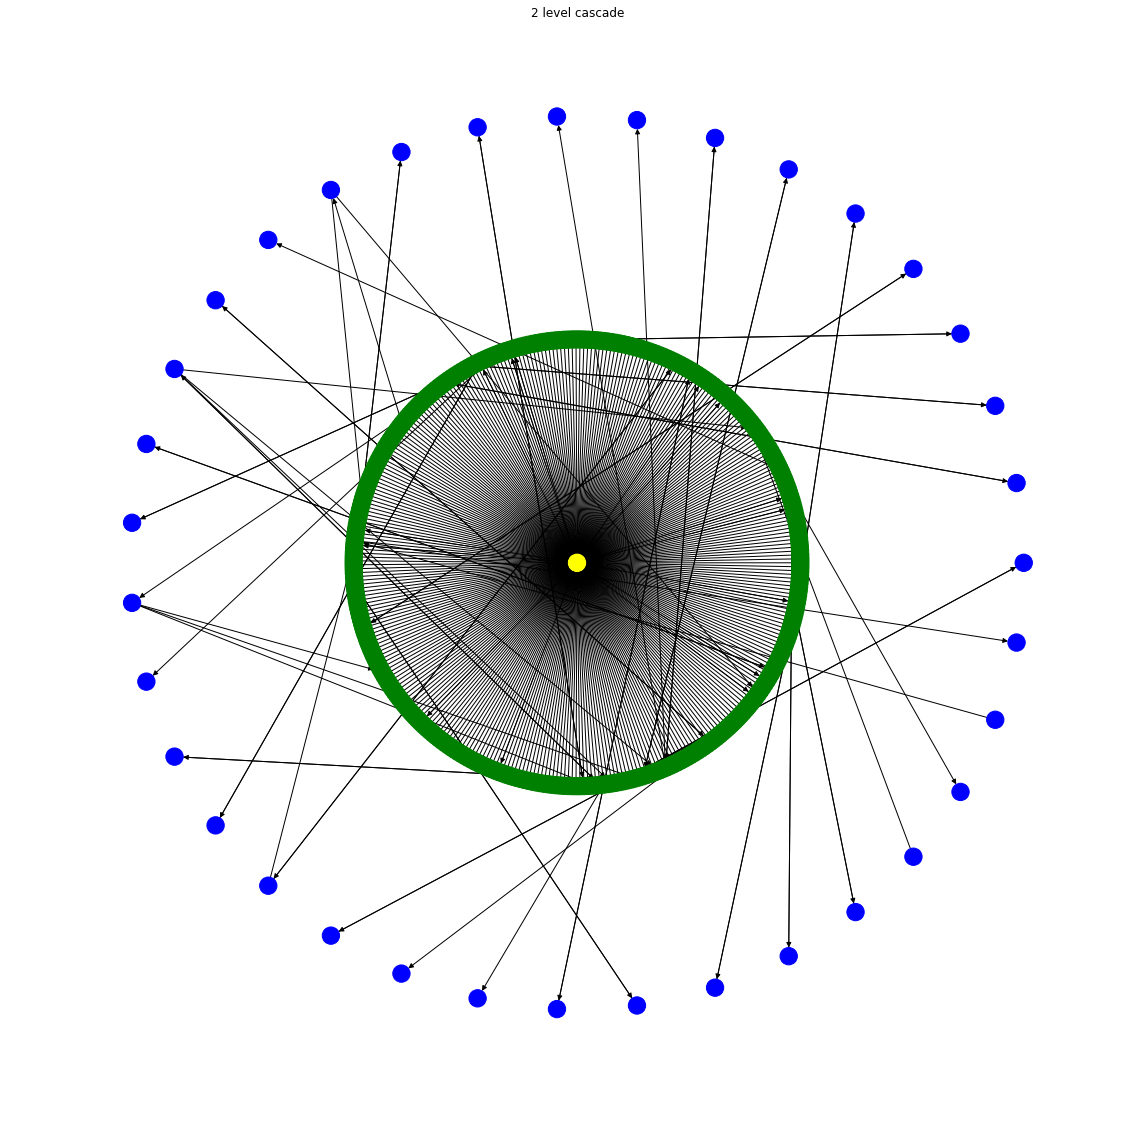

G_3.gpickle
{}
{4357270032: 1, 2436000656: 0, 1416614886: 2}
['yellow', 'green', 'blue']


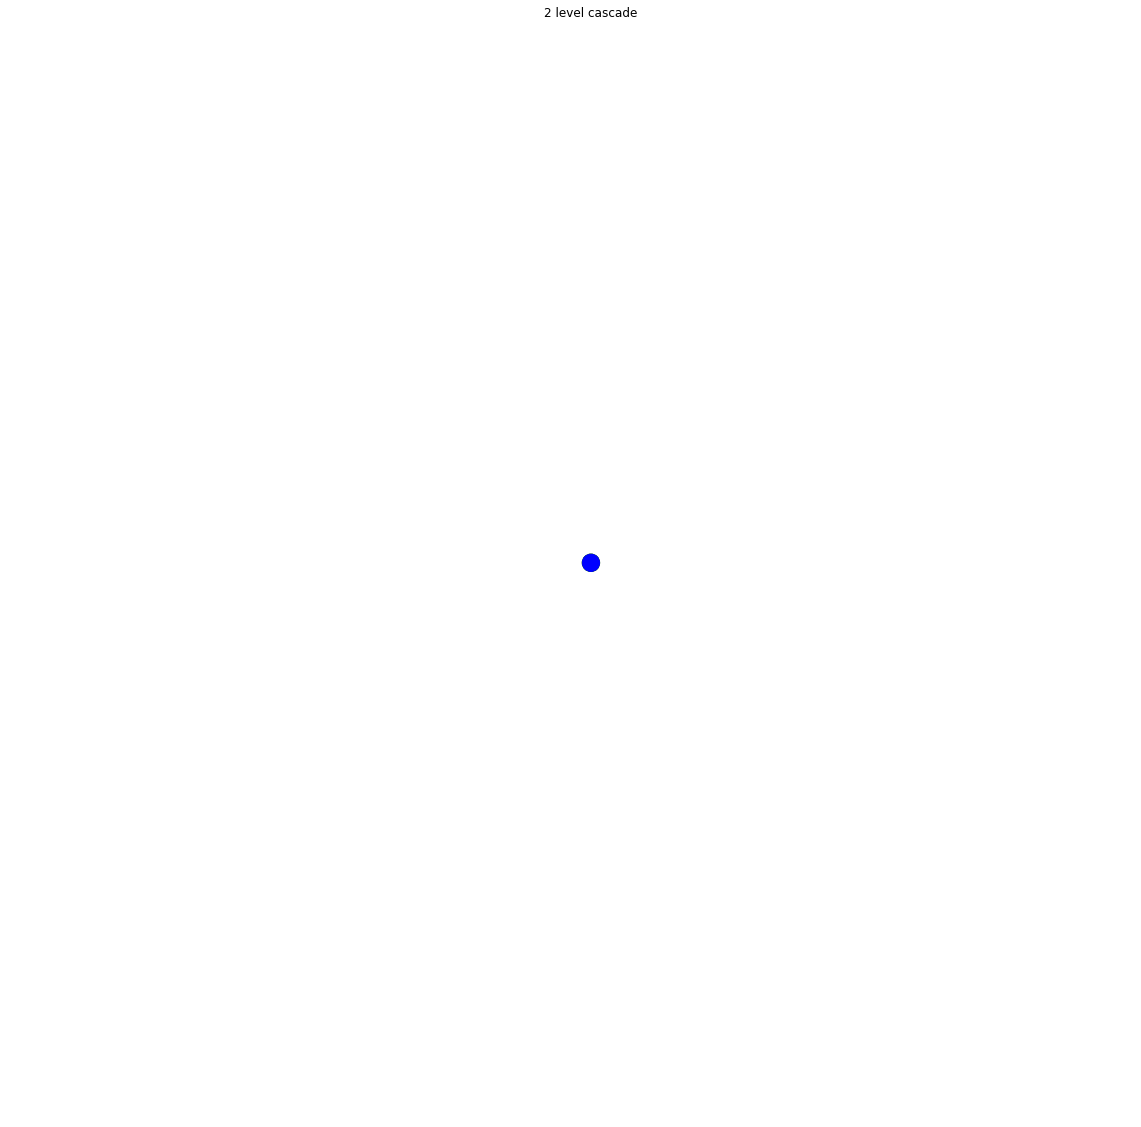

G_2937602802_8.gpickle
{283092227: 1, 2937602802: 0, 4184236933: 1, 2159584141: 1, 2602916816: 1, 572907926: 1, 3740327718: 2, 1422111620: 2}
['yellow', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue']


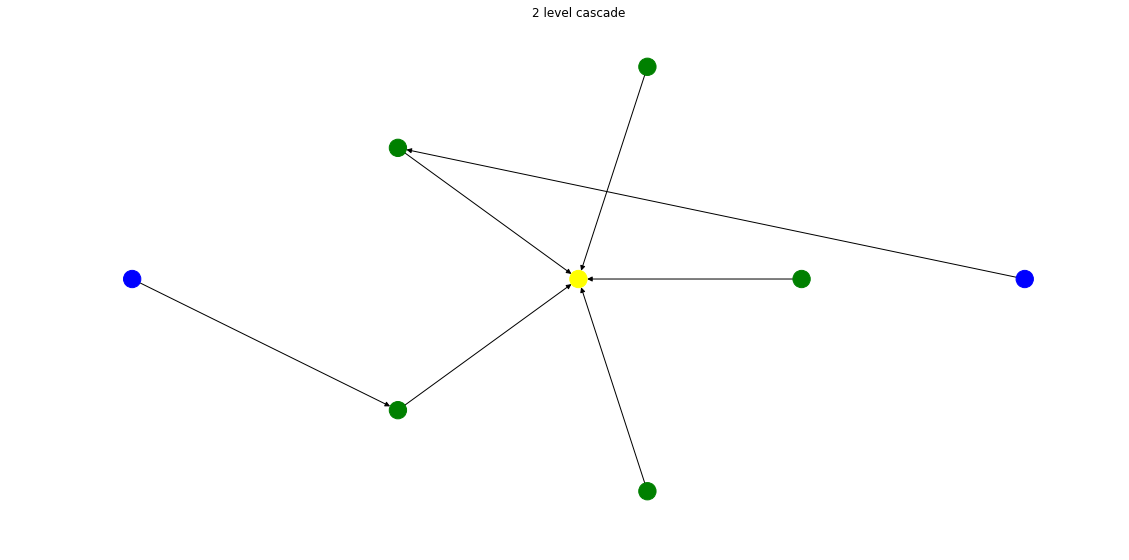

G_16870853_7.gpickle
{15247690: 1, 16870853: 0, 207413706: 1, 22212944: 1, 423906777: 1, 34342490: 1}
['yellow', 'green', 'green', 'green', 'green', 'green']


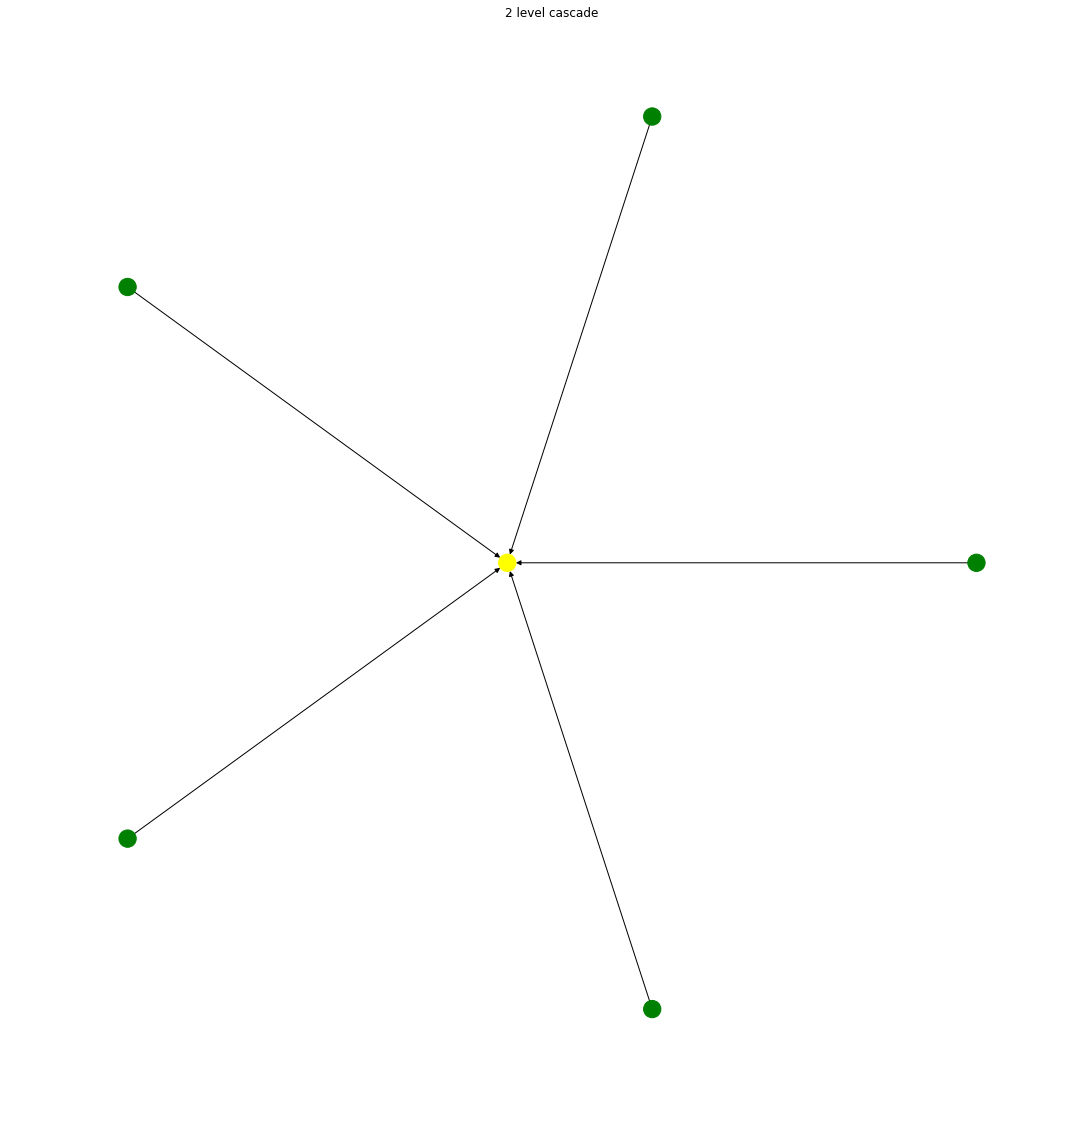

In [539]:
for idx,file in enumerate(filenames):
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    plot(G)

In [537]:
shells = get_shells(G)
shells

{15247690: 1, 16870853: 0, 207413706: 1, 22212944: 1, 423906777: 1, 34342490: 1}


[[16870853], [15247690, 207413706, 22212944, 423906777, 34342490]]

In [570]:
## return fraction of nodes at each depth
def get_nodes_depth(G):
    nodes_depth = nx.get_node_attributes(G,'level')
    if (not nodes_depth):
        nodes_depth = nx.get_node_attributes(G,'depth')
    depth_nodes = list()
    depth = 0
    for depth in np.arange(10):
        if(len([k for k,v in nodes_depth.items() if v == depth])):
            depth_nodes.append(len([k for k,v in nodes_depth.items() if v == depth]))
            depth +=1
        else:
            depth_nodes.append(0)
    total_nodes = np.sum(depth_nodes)
    fraction_nodes_depth = list()
    for node_depth in depth_nodes:
        temp = node_depth / total_nodes
        fraction_nodes_depth.append(temp)
    return fraction_nodes_depth

In [571]:
nodes_at_depth

[1, 0.8333333333333334]

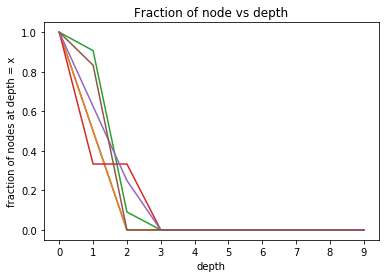

In [573]:
for file in filenames:
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    nodes_at_depth = get_nodes_depth(G)
    nodes_at_depth[0] = 1 # depth zero as start node
    plt.plot(np.arange(len(nodes_at_depth)),nodes_at_depth)
    plt.xlabel("depth")
    plt.ylabel("fraction of nodes at depth = x")
    plt.xticks(np.arange(len(nodes_at_depth)))
    plt.title("Fraction of node vs depth")
plt.show()

In [535]:
157067455 in G.nodes
'level' not in G.nodes[157067455]

False

In [521]:
pos = nx.shell_layout(G,shells)
color_map = get_color_map(pos,shells)
color_map

['yellow', 'green']

## testing

In [511]:
G= nx.read_gpickle("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/graphs/G_juul_cascade.gpickle")

In [340]:
G.nodes()

NodeView((15247690, 16870853, 34342490, 22212944, 423906777, 207413706))

In [343]:
G.nodes[22212944]

{'friends': 1396, 'followers': 313, 'level': 1}

In [330]:
cas = Cascade()
df_tweets = cas.get_unique_tweets(hexagon_data)

In [464]:
set([1]) == set({1})

True